In [1]:
%%html
<!-- RTL Fix the jupyter notebook 7  -->
<style>
    .jp-RenderedHTMLCommon {
        padding-top: 2em !important;
  }   
    .jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon * {
        direction: rtl !important;
        text-align:right !important;
  }
    .jp-MarkdownCell .jp-InputArea-editor {
        direction: rtl !important; 
        text-align:right !important;
        padding-top: 2em !important;
  } 

 .jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span {
        text-align:left !important;
        direction: ltr !important;
        unicode-bidi: embed !important;

    }
    .jp-RenderedHTMLCommon pre:has(code) {
      direction: ltr !important;
      text-align: left!important;
    }

</style> 

In [2]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

# mutable vs. immutable בזכרון

### אג'נדה
- הפניות לערכים - השמות מאחורי הקלעים.
- ההבדל בין mutables וimmutables.

<span style="color:red"> ### סרטון הקדמה</span>

עד כה הכרנו את ההבדל העקרוני בין טיפוסים mutable (שניתנים לשינוי) לבין טיפוסים immutable (שאינם ניתנים לשינוי) - כלומר, האם ניתן או לא ניתן לערוך את האובייקט לאחר שנוצר. במודול זה נעמיק צעד נוסף: נבין מה בעצם קורה "מאחורי הקלעים" בפייתון כאשר אנחנו מבצעים השמות או שינויים במשתנים. נבחן איך פייתון מנהלת את האובייקטים בזיכרון, מה ההבדל בין שינוי ערך קיים לבין יצירה של אובייקט חדש, וכיצד זה משפיע על ההתנהגות של משתנים בתוכנית שלנו.

## הפניות לערכים mutable לעומת immutable מנקודת מבט של הזכרון

בפייתון, כל מידע מאוחסן באובייקטים. כשאנחנו כותבים למשל `a=3`, נוצר אובייקט חדש שמייצג את המספר שלוש, והמשתנה `a` הוא שם שמצביע עליו.  
אם אחר כך נגדיר `b=a`, לא ייווצר אובייקט חדש, אלא **שם** חדש אשר מצביע בדיוק לאותו אובייקט.  
כלומר, מה שמועתק הוא ההפנייה (החץ), ולא הערך עצמו.

ככלל, פעולת ההשמה (על-ידי `=`) היא סימון מצביע מהשם (במרחב השמות) לערך (במרחב האובייקטים).

### השמה של רשימות

נראה כעת דוגמא שתעזור לנו להבין מה קורה מאחורי הקלעים:

In [1]:
orig_list = [1,2,3]
copy_list = orig_list 
orig_list = [6,7,8,9]

אחרי שתי השורות הראשונות, השמות `orig_list` ו`copy_list` מצביעים לאותו אובייקט - שהוא רשימה `[1,2,3]`.  



בשורה השלישית מתבצעת השמה מחדש של `orig_list`. כלומר כעת השם `orig_list` מצביע לאובייקט אחר לגמרי - `[6,7,8,9]`. 

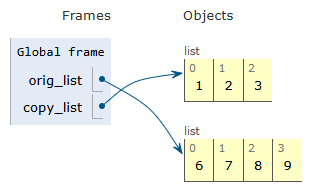

האם שינינו או פגענו איכשהוא בקישור בין `copy_list` לבין האובייקט `[1,2,3]`?

In [2]:
print(copy_list)
print(orig_list)

[1, 2, 3]
[6, 7, 8, 9]


התשובה היא לא. החץ המצביע בין `copy_list` לבין האובייקט נשאר זהה, והרשימה לא השתנתה.

אבל מה יקרה אם נבצע עריכה ממשית של האובייקט המשותף?

In [3]:
orig_list = [1,2,3]
copy_list = orig_list 
orig_list[0] = 1000

במקרה זה, שתי השורות העליונות מתבצעות באופן זהה.  
עם זאת, הפעם אנחנו עורכים את **האובייקט** עצמו, ולא משנים את ההצבעה למקום אחר.   



ולכן הערך של האיבר הראשון השתנה ל`copy_list` "מתחת לאף".


In [4]:
print(orig_list)
print(copy_list)

[1000, 2, 3]
[1000, 2, 3]


## משתנים ניתנים לשינוי (mutable) לעומת שאינם ניתנים לשינוי (immutable)

אובייקטים הניתנים לשינוי אפשר לערוך לאחר יצירה. השינוי מתבצע **באובייקט עצמו**

In [ ]:
my_list = [1, 2, 4, 5, 7, 8]
my_list[4] = 500

באובייקטים שלא ניתנים לשינוי, כל מודיפיקציה יוצרת **אובייקט חדש**, וניתן לבצע השמה עבורו.

In [5]:
a=5
b=a
a+=1

print(a, b)

6 5


המשתנה `a` מפנה כעת לאובייקט אחר, בדיוק כמו אם השורה השלישית הייתה אומרת `a=6`.

## דוגמה להשמה עם משתנים קבועים

In [5]:
%%html
<iframe width="800" height="500" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=a%3D%22hello%22%0Ab%3Da%0Ac%3Da.lower%28%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=true&origin=opt-frontend.js&py=311&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>

In [7]:
import json
from jupyterquiz import display_quiz

example = \
'''
   [{
    
        "question": "לאחר שרצו שתי השורות הראשונות, כמה אובייקטים קיימים בקוד?",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 1,
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "type": "default",
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [8]:
example = \
'''
   [{
    
        "question": "לאחר שכל הקוד רץ, כמה אובייקטים קיימים בקוד?",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 2,
                "correct": true,
                "feedback": "נכון! הפעולה  lower יצרה אובייקט חדש מאחר שמחרוזות לא ניתנות לעריכה"
            },
            {
                "type": "default",
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

## דוגמא עם משתנים הניתנים לשינוי

עקבו כעת באמצעות Python Tutor אחר הקוד שלפניכם:

In [6]:
%%html
<iframe width="800" height="500" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=L1%3D%5B1,2,3%5D%0AL2%3DL1%0AL1%5B1%5D%3D5&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=true&origin=opt-frontend.js&py=311&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>

לאחר הרצת שתי שורות הקוד הראשונות, ניתן לראות כי גם L1 וגם L2 מצביעים לתחילת הרשימה. זה גם מה שקורה בפועל.
בשלב הבא, כשנשנה את `L1[0]` ל5, אז השינוי יתבצע במצביע של מיקום 1 ברשימה. כלומר השינוי יבוא לידי ביטוי גם בL2.

ומה יקרה אם עכשיו נוסיף את השורה `L2 = L2 + [7]`?
הוסיפו את השורה לpython tutor ובדקו.

In [9]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
        "question": "האם האיבר 7 נוסף לרשימה L1?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "7 נוסף גם לL2 וגם לL1",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "7 נוסף רק לL2",
                "correct": true,
                "feedback": "נכון! פעולה כמו + יוצרת רשימה חדשה, ולכן התבצעה פה דריסה של המשתנה L2 ולא עריכה של האובייקט"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>